In [29]:
import json 
import numpy as np 
import pandas as pd 
import tensorflow as tf
import string
import nltk
from nltk import *
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D , Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt

In [30]:
with open("../data/Intent.json") as train_file:
    df= json.load(train_file)

# TOKENIZATION

In [31]:
df["intents"][0]["intent"]

'Greeting'

In [32]:
tags = []
inputs = []
responses = {}

for intent in df['intents']:
    responses[intent['intent']] = intent['responses']
    for lines in intent['text']:
        inputs.append(lines)
        tags.append(intent['intent'])
df = pd.DataFrame({'inputs': inputs, 'tags': tags})
df

,inputs,tags
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting
...,...,...
138,Can you prove you have a conscious,SelfAware
139,Can you prove you are self-aware please,SelfAware
140,Can you prove you are self aware please,SelfAware
141,Can you prove you have a conscious please,SelfAware


In [33]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [54]:
# Tokenizer les data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df["inputs"])
train = tokenizer.texts_to_sequences(df["inputs"])

In [35]:
# apply padding
x_train = pad_sequences(train)

In [36]:
#encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(df['tags'])

In [37]:
input_shape = x_train.shape[1]
print(input_shape)

9


In [38]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_length = le.classes_.shape[0]
print("output length ", output_length)

number of unique words : 117
output length  22


# RNN

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks

In [40]:
#creating model
model = Sequential()
model.add(Embedding(vocabulary+1,10))
model.add(InputLayer(input_shape=(input_shape,)))
model.add(SimpleRNN(30))
model.add(Dense(output_length, activation="softmax"))

In [41]:
#compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [42]:
train = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 3.1063 - accuracy: 0.0629
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 3.0806 - accuracy: 0.0979
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 3.0614 - accuracy: 0.1608
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 3.0424 - accuracy: 0.2168
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 3.0230 - accuracy: 0.2517
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 3.0005 - accuracy: 0.2727
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 2.9755 - accuracy: 0.2797
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9467 - accuracy: 0.3077
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9113 - accuracy: 0.3427
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 2.8728 - accuracy: 0.3357
Epoch 11/100
5/5 [===========

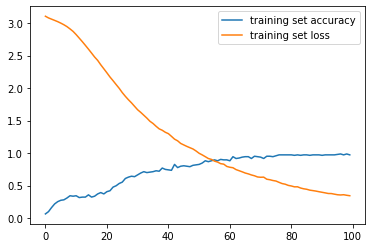

In [43]:
#plotting model accuracy
plt.plot(train.history['accuracy'], label="training set accuracy")
plt.plot(train.history["loss"], label ="training set loss")
plt.legend()

In [ ]:
#chatting

while True:
    texts_p = []
    prediction_input = input("You : ")
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = "".join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Bot :",random.choice(responses[response_tag]))
    if response_tag == "goodbye" :
        break

# DELETE OR ADD STOPWORDS

In [44]:
from nltk.corpus import stopwords

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
stop_words = stopwords.words("english")

In [63]:
print(stop_words)
#this will show all the default stop word in the language english

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [63]:
stop_words.append("work")
stop_words
#this will add or remove a stop word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# STEMMING

In [39]:
from nltk.stem import PorterStemmer

In [40]:
stemmers = PorterStemmer()

In [42]:
input_str = "i don't know what i am doing please help"

In [43]:
input_str = nltk.word_tokenize(input_str)

In [45]:
for word in input_str :
    print(stemmers.stem(word))

i
do
n't
know
what
i
am
do
pleas
help


# LEMMATIZATION

In [47]:
from nltk.stem import WordNetLemmatizer

In [48]:
lemmatizer = WordNetLemmatizer()

In [49]:
input_str = "so is it the same than stemming"

In [50]:
input_str = nltk.word_tokenize(input_str)

In [52]:
for word in input_str :
    print(lemmatizer.lemmatize(word))

so
is
it
the
same
than
stemming


In [53]:
lemmatizer = WordNetLemmatizer()

In [54]:
for index,row in data.iterrows():
    filter_sentence = []
    sentence = row["Title"]

AttributeError: 'dict' object has no attribute 'iterrows'

In [11]:
#Define Sequential Model
model = Sequential() 
#Create input layer
model.add(Dense(32, input_dim=784))
#Create hidden layer 
model.add(Activation('relu')) 
#Create Output layer
model.add(Activation('sigmoid')) 

In [12]:
#Compiling the model with a mean squared error loss and RMSProp #optimizer
model.compile(optimizer='rmsprop',loss='mse')

In [55]:
model.fit(input_str, labels, epochs=10, batch_size=32)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'str'>"}), (<class 'list'> containing values of types set())

In [6]:
label_enc = LabelEncoder()

In [7]:
label_enc.fit()

ValueError: y should be a 1d array, got an array of shape (3725, 2) instead.